In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 1) One dimension

In [15]:
d = np.arange(0,0.55,0.05)

In [16]:
proba=(1-2*d)
proba2=(1-2*d)**2
proba3=(1-2*d)**3

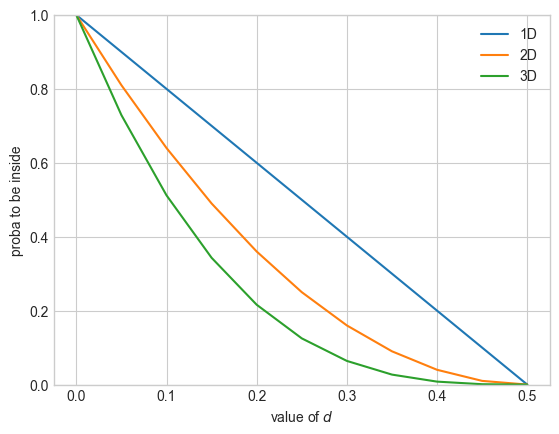

In [17]:
plt.plot(d,proba)
plt.plot(d,proba2)
plt.plot(d,proba3)
plt.ylim(0, 1)
plt.xlabel("value of $d$")
plt.ylabel("proba to be inside")
plt.legend(["1D", "2D", "3D"])

# 2) N dimensions

In [20]:
d = 0.01
n=np.arange(0,100,1)

In [23]:
d = 0.01
proba_0p01=(1-2*d)**n
d = 0.1
proba_0p1=(1-2*d)**n
d = 0.2
proba_0p2=(1-2*d)**n

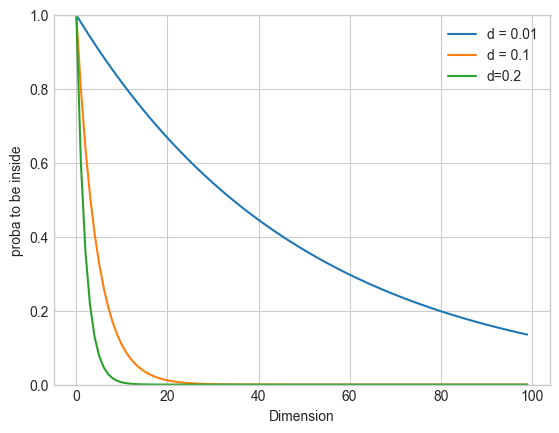

In [24]:
plt.plot(n,proba_0p01)
plt.plot(n,proba_0p1)
plt.plot(n,proba_0p2)
plt.ylim(0, 1)
plt.xlabel("Dimension")
plt.ylabel("proba to be inside")
plt.legend(["d = 0.01", "d = 0.1", "d=0.2"])

# 3) Variance w.r.t number of points

Simulation of points ...
Size of the sample (P) =    5 | Variance of empirical means = 4.8588
Size of the sample (P) =   10 | Variance of empirical means = 2.3511
Size of the sample (P) =   30 | Variance of empirical means = 0.8275
Size of the sample (P) =   50 | Variance of empirical means = 0.5643
Size of the sample (P) =  100 | Variance of empirical means = 0.2576
Size of the sample (P) =  250 | Variance of empirical means = 0.0935
Size of the sample (P) =  500 | Variance of empirical means = 0.0485
Size of the sample (P) = 1000 | Variance of empirical means = 0.0255
Size of the sample (P) = 2000 | Variance of empirical means = 0.0124
Size of the sample (P) = 5000 | Variance of empirical means = 0.0049


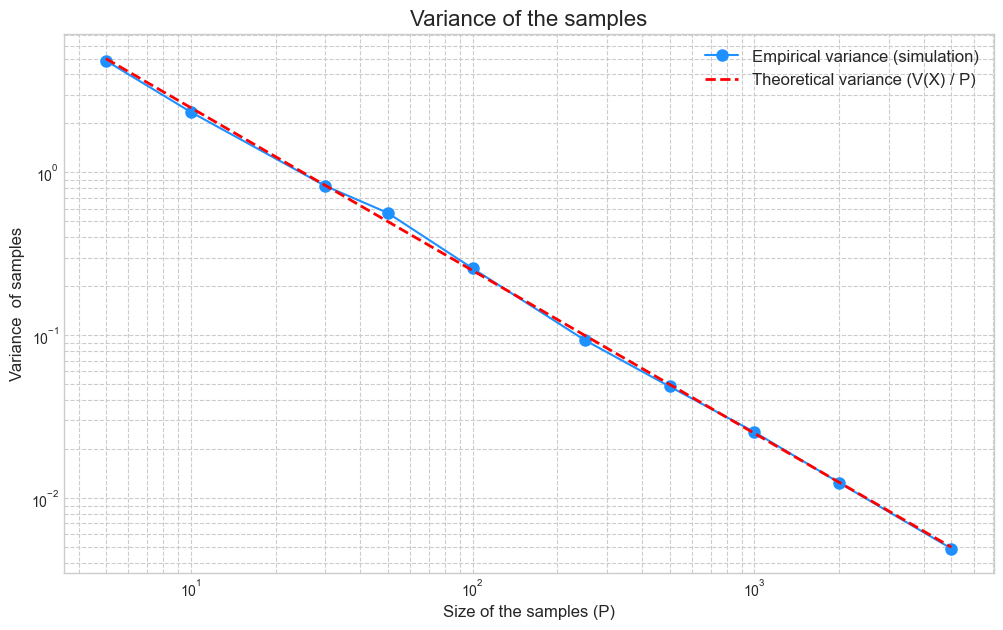

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generation of data
population_mean = 10
population_std_dev = 5
population_variance = population_std_dev**2
population = np.random.normal(population_mean, population_std_dev, 100000)

# size of samples
sample_sizes = [5, 10, 30, 50, 100, 250, 500, 1000, 2000, 5000]
# Number of simulations
n_simulations = 1000

empirical_variances = []

print("Simulation of points ...")
for P in sample_sizes:
    sample_means = []
    for _ in range(n_simulations):
        # A sample of size P
        sample = np.random.choice(population, size=P, replace=True)
        # Mean
        sample_means.append(np.mean(sample))
    
    # Variance
    variance_of_means = np.var(sample_means)
    empirical_variances.append(variance_of_means)
    print(f"Size of the sample (P) = {P:4d} | Variance of empirical means = {variance_of_means:.4f}")

# Theoretical variance
theoretical_variances = [population_variance / P for P in sample_sizes]


plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

plt.plot(sample_sizes, empirical_variances, 'o-', label='Empirical variance (simulation)', color='dodgerblue', markersize=8)

plt.plot(sample_sizes, theoretical_variances, 'r--', label='Theoretical variance (V(X) / P)', linewidth=2)

plt.title("Variance of the samples", fontsize=16)
plt.xlabel("Size of the samples (P)", fontsize=12)
plt.ylabel("Variance  of samples", fontsize=12)
plt.legend(fontsize=12)
plt.xscale('log') 
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

# 4) Exercise

In [6]:
import numpy as np

X = np.array([
    [-2,  3, -1],
    [-1,  1,  0],
    [ 2, -1, -1],
    [ 1, -3,  2]
])



## 4.1) Computation with definitions

In [8]:
import math

def print_matrix(title, matrix):
    """Prints a matrix with a title and formatted numbers."""
    print(title)
    for row in matrix:
        print("  [" + ", ".join(f"{x:8.4f}" for x in row) + "]")
    print("-" * 45)


# N = number of observations (rows)
# P = number of variables (columns)
N = len(X)
P = len(X[0])

print("Initial Data Matrix X:")
for row in X:
    print(f"  {row}")
print("-" * 45)


mean_vector = [0.0] * P
for j in range(P):
    col_sum = 0
    for i in range(N):
        col_sum += X[i][j]
    mean_vector[j] = col_sum / N

print("Mean Vector:")
print(f"  {mean_vector}")
print("-" * 45)


# Calculate the variance-covariance matrix
cov_matrix = [[0.0] * P for _ in range(P)]
for j in range(P):
    for k in range(P):
        sum_of_products = 0
        for i in range(N):
            term1 = X[i][j] - mean_vector[j]
            term2 = X[i][k] - mean_vector[k]
            sum_of_products += term1 * term2
        # Use (N-1) for the sample covariance
        cov_matrix[j][k] = sum_of_products / (N - 1)

print_matrix("Variance-Covariance Matrix:", cov_matrix)


# Center and standardize the data
X_centered = [[0.0] * P for _ in range(N)]
for i in range(N):
    for j in range(P):
        X_centered[i][j] = X[i][j] - mean_vector[j]

# Standardize: Z[i][j] = Z_centered[i][j] / std_dev[j]
# First, get standard deviations from the variance (diagonal of covariance matrix)
std_dev_vector = [math.sqrt(cov_matrix[j][j]) for j in range(P)]

X_standardized = [[0.0] * P for _ in range(N)]
for i in range(N):
    for j in range(P):
        # Avoid division by zero, although not an issue with this data
        if std_dev_vector[j] > 0:
            X_standardized[i][j] = X_centered[i][j] / std_dev_vector[j]

print_matrix("Centered and Standardized Data (Z):", X_standardized)


# Calculate the correlation matrix
# Formula: Corr(j, k) = Cov(j, k) / (std_dev[j] * std_dev[k])
corr_matrix = [[0.0] * P for _ in range(P)]
for j in range(P):
    for k in range(P):
        std_dev_prod = std_dev_vector[j] * std_dev_vector[k]
        # Avoid division by zero
        if std_dev_prod > 0:
            corr_matrix[j][k] = cov_matrix[j][k] / std_dev_prod

print_matrix("Correlation Matrix:", corr_matrix)

Initial Data Matrix X:
  [-2  3 -1]
  [-1  1  0]
  [ 2 -1 -1]
  [ 1 -3  2]
---------------------------------------------
Mean Vector:
  [np.float64(0.0), np.float64(0.0), np.float64(0.0)]
---------------------------------------------
Variance-Covariance Matrix:
  [  3.3333,  -4.0000,   0.6667]
  [ -4.0000,   6.6667,  -2.6667]
  [  0.6667,  -2.6667,   2.0000]
---------------------------------------------
Centered and Standardized Data (Z):
  [ -1.0954,   1.1619,  -0.7071]
  [ -0.5477,   0.3873,   0.0000]
  [  1.0954,  -0.3873,  -0.7071]
  [  0.5477,  -1.1619,   1.4142]
---------------------------------------------
Correlation Matrix:
  [  1.0000,  -0.8485,   0.2582]
  [ -0.8485,   1.0000,  -0.7303]
  [  0.2582,  -0.7303,   1.0000]
---------------------------------------------


## 4.2) Using numpy functions

In [5]:
# No scientific notations
np.set_printoptions(suppress=True, precision=4)

print("Initial data matrix :")
print(X)
print("-" * 35)

mean_vector = np.mean(X, axis=0)
print("Average :")
print(mean_vector)
print("-" * 35)


cov_matrix = np.cov(X, rowvar=False, ddof=1)
print("Variance-covariance - matrix :")
print(cov_matrix)
print("-" * 35)


X_centered = X - mean_vector

std_dev_vector = np.std(X, axis=0, ddof=1)
X_standardized = X_centered / std_dev_vector

print("Standardization :")
print(X_standardized)
print("-" * 35)


corr_matrix = np.corrcoef(X, rowvar=False)
print("Corrélation matrix :")
print(corr_matrix)
print("-" * 35)



Initial data matrix :
[[-2  3 -1]
 [-1  1  0]
 [ 2 -1 -1]
 [ 1 -3  2]]
-----------------------------------
Average :
[0. 0. 0.]
-----------------------------------
Variance-covariance - matrix :
[[ 3.3333 -4.      0.6667]
 [-4.      6.6667 -2.6667]
 [ 0.6667 -2.6667  2.    ]]
-----------------------------------
Standardization :
[[-1.0954  1.1619 -0.7071]
 [-0.5477  0.3873  0.    ]
 [ 1.0954 -0.3873 -0.7071]
 [ 0.5477 -1.1619  1.4142]]
-----------------------------------
Corrélation matrix :
[[ 1.     -0.8485  0.2582]
 [-0.8485  1.     -0.7303]
 [ 0.2582 -0.7303  1.    ]]
-----------------------------------


## 4.3) eigen value / vectors

In [10]:
import numpy as np

A = np.array([
    [2, 0, 1],
    [0, 1, 0],
    [1, 0, 2]
])

np.set_printoptions(suppress=True, precision=4)

print("Matrix A :")
print(A)
print("-" * 45)

eigenvalues, eigenvectors = np.linalg.eig(A)

print("Eigen values (numpy) :")
print(eigenvalues)
print("-" * 45)

print("Eigen vectors (numpy) :")
print(eigenvectors)
print("-" * 45)

for i in range(len(eigenvalues)):
    print(f"-> For eigen value λ = {eigenvalues[i]:.2f}")
    v = eigenvectors[:, i]
    print(f"   Associated eigen vector = {v}\n")

Matrix A :
[[2 0 1]
 [0 1 0]
 [1 0 2]]
---------------------------------------------
Eigen values (numpy) :
[3. 1. 1.]
---------------------------------------------
Eigen vectors (numpy) :
[[ 0.7071 -0.7071  0.    ]
 [ 0.      0.      1.    ]
 [ 0.7071  0.7071  0.    ]]
---------------------------------------------
-> For eigen value λ = 3.00
   Associated eigen vector = [0.7071 0.     0.7071]

-> For eigen value λ = 1.00
   Associated eigen vector = [-0.7071  0.      0.7071]

-> For eigen value λ = 1.00
   Associated eigen vector = [0. 1. 0.]



## 4.4) Exercise

In [12]:
import numpy as np

# --- Initial Data ---
X = np.array([
    [2, 3],
    [5, 9],
    [4, 7],
    [3, 5],
    [11, 21]
])

# Set print options for better readability
np.set_printoptions(suppress=True, precision=4)

print("Original Data Matrix X:")
print(X)
print("-" * 50)


# --- 1. Center the Data (but do not reduce/standardize) ---
mean_vector = np.mean(X, axis=0)
X_centered = X - mean_vector

print("Centered Data Matrix Xc:")
print(X_centered)
print("-" * 50)


# --- Calculate Covariance, Eigenvalues, and Eigenvectors ---

cov_matrix = np.cov(X_centered, rowvar=False, ddof=1)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]



# 1. What are the principal axes?
print("1. What are the principal axes?")
principal_axis_1 = eigenvectors[:, 0]
principal_axis_2 = eigenvectors[:, 1]
print(f"   - Principal Axis 1 (PC1): {principal_axis_1}")
print(f"   - Principal Axis 2 (PC2): {principal_axis_2}")
print("-" * 50)


# 2. What are the coordinates of these points in the new basis?
new_coordinates = X_centered @ eigenvectors
print("2. New coordinates of the points (Projections):")
print(new_coordinates)
print("-" * 50)


# 3. What is the coefficient of correlation?
corr_matrix = np.corrcoef(X, rowvar=False)
correlation_coefficient = corr_matrix[0, 1]
print("3. What is the coefficient of correlation?")
print(f"   - The correlation coefficient is: {correlation_coefficient:.4f}")
print("-" * 50)


# 4. What conclusions can we draw?
print("4. What conclusions can we draw?")
print(f"   - Eigenvalues: {eigenvalues}")
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print(f"   - Variance explained by PC1: {explained_variance_ratio[0]:.2%}")
print(f"   - Variance explained by PC2: {explained_variance_ratio[1]:.2%}")
print("\n   - The correlation is 1, indicating a perfect linear relationship.")
print("   - The 2nd eigenvalue is effectively zero, meaning PC1 captures 100% of the information.")
print("   - This confirms the data is one-dimensional; all points lie perfectly on a line.")
print("-" * 50)

Original Data Matrix X:
[[ 2  3]
 [ 5  9]
 [ 4  7]
 [ 3  5]
 [11 21]]
--------------------------------------------------
Centered Data Matrix Xc:
[[-3. -6.]
 [ 0.  0.]
 [-1. -2.]
 [-2. -4.]
 [ 6. 12.]]
--------------------------------------------------
1. What are the principal axes?
   - Principal Axis 1 (PC1): [-0.4472 -0.8944]
   - Principal Axis 2 (PC2): [-0.8944  0.4472]
--------------------------------------------------
2. New coordinates of the points (Projections):
[[  6.7082   0.    ]
 [  0.       0.    ]
 [  2.2361   0.    ]
 [  4.4721   0.    ]
 [-13.4164   0.    ]]
--------------------------------------------------
3. What is the coefficient of correlation?
   - The correlation coefficient is: 1.0000
--------------------------------------------------
4. What conclusions can we draw?
   - Eigenvalues: [62.5  0. ]
   - Variance explained by PC1: 100.00%
   - Variance explained by PC2: 0.00%

   - The correlation is 1, indicating a perfect linear relationship.
   - The 2nd eig